### Setting Up

In [46]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold # import k-fold validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize

from graphviz import Source
from sklearn.tree import export_graphviz

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    
# to make this notebook's output stable across runs
np.random.seed(42)

#### Loading in the Data

In [28]:
#Loading in the Data
df = pd.read_csv("./water_potability.csv")

In [29]:
#Filling in the missing values

#Filling NaN pH Values
df["ph"].fillna(value = df["ph"].mean(), inplace = True)

#Filling NaN Sulfate Values
df["Sulfate"].fillna(value = df["Sulfate"].mean(), inplace = True)

#Filling NaN Trihalomethanes Values
df["Trihalomethanes"].fillna(value = df["Trihalomethanes"].mean(), inplace = True)

Creating Testing and Training Data

In [30]:
X = df.iloc[: , :-1]
y = df['Potability']
feature_names = X.columns;

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Naive Bayes

In [31]:
# create a Naive Bayes classifier using the training data
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

GaussianNB()

Performance Results

In [32]:
# predict the class labels for test data
y_pred = nbclf.predict(X_test)

target_names = ['potable', 'non-potable']

# plot a confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
result_metrics = classification_report(y_test, y_pred, target_names = target_names)

print(result_metrics)

[[435  67]
 [251  66]]
              precision    recall  f1-score   support

     potable       0.63      0.87      0.73       502
 non-potable       0.50      0.21      0.29       317

    accuracy                           0.61       819
   macro avg       0.57      0.54      0.51       819
weighted avg       0.58      0.61      0.56       819



K-Cross Validation

In [34]:
from sklearn.model_selection import KFold # import k-fold validation

# Define the split
kf = KFold(n_splits=3, random_state=None, shuffle=True) 
# returns the number of splitting iterations in the cross-validator
kf.get_n_splits(kf) 

for train_index, test_index in kf.split(X_train):
    # for each iteration, get training data and test data
    X_ktrain, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_ktrain, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # train the model using training data
    nbclf.fit(X_ktrain, y_ktrain)
    
    # show how model performs with training data and test data
    print('Accuracy of GaussianNB classifier on training set: {:.2f}'
         .format(nbclf.score(X_ktrain, y_ktrain)))

    print('Accuracy of GaussianNB classifier on test set: {:.2f}'
         .format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.63
Accuracy of GaussianNB classifier on test set: 0.61
Accuracy of GaussianNB classifier on training set: 0.64
Accuracy of GaussianNB classifier on test set: 0.61
Accuracy of GaussianNB classifier on training set: 0.63
Accuracy of GaussianNB classifier on test set: 0.60


In [35]:
# create a Naive Bayes classifier using the training data
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

# predict class labels on test data
y_pred = nbclf.predict(X_test)

ROC Curve

Accuracy =  0.5660449683914186


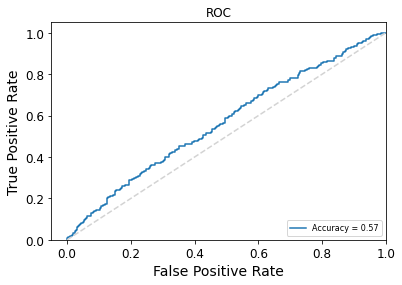

In [36]:
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

accuracy:  0.4739904734374804


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


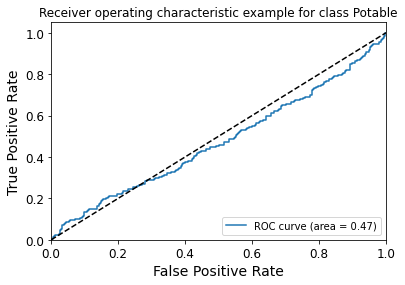

accuracy:  0.47719217766159333


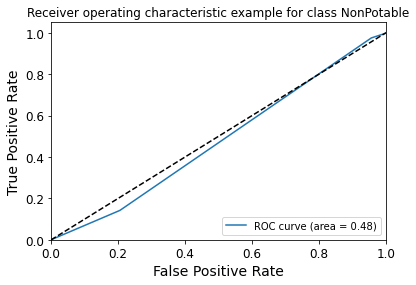

In [37]:
scaler = MinMaxScaler()

normalized_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, random_state = 0)

names = ['Potable', 'NonPotable']

# we assume that your NB classifier's name is nbclf.
# Otherwise, you need to modify the name of the model. 
y_score = nbclf.predict_proba(X_test)
    
y_test_Naive = label_binarize(y_test, classes=[0,1,2])
n_classes = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_Naive[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    print("accuracy: " , roc_auc[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example for class ' + names[i] )
    plt.legend(loc="lower right")
    plt.show()

### Decision Tree - Entropy and Gini Index

Setting Up

In [38]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

##### Evaluate the model for Gini Index

In [ ]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

Confusion Matrix

In [ ]:
y_pred = clf.predict(X_test)
# plot a confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

Model Performance Summary

In [ ]:
# Print classification report
target_names = ['0', '1']
result_metrics = classification_report(y_test, y_pred, target_names=target_names)
print(result_metrics)

Feature Importance

In [ ]:
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(8,4), dpi=60)

# call the function above
plot_feature_importances(clf, feature_names=feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

ROC Curve

In [ ]:
nbclf = DecisionTreeClassifier(criterion='gini')
nbclf.fit(X_train, y_train)
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Cross Validation

In [ ]:

kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

scaler = MinMaxScaler()

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='gini')
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))

In [ ]:
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "water.dot"),
        feature_names=feature_names,
        class_names=["0", "1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "water.dot"))

##### Evaluating the Model for Entropy

In [39]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Confusion Matrix

In [40]:
y_pred = clf2.predict(X_test)
# plot a confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[336 166]
 [174 143]]


Model Performance Summary

In [41]:
# Print classification report

target_names = ['0', '1']
result_metrics = classification_report(y_test, y_pred, target_names=target_names)
print(result_metrics)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       502
           1       0.46      0.45      0.46       317

    accuracy                           0.58       819
   macro avg       0.56      0.56      0.56       819
weighted avg       0.58      0.58      0.58       819



Feature Importance

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.58


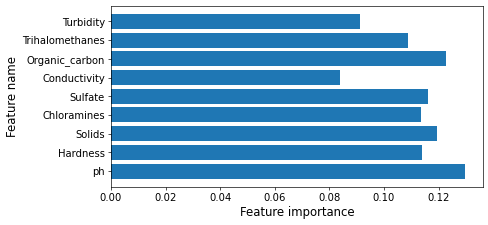

Feature importances: [0.13 0.11 0.12 0.11 0.12 0.08 0.12 0.11 0.09]


In [47]:
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

plt.figure(figsize=(8,4), dpi=60)
plot_feature_importances(clf2, feature_names=feature_names)
plt.show()

print('Feature importances: {}'.format(clf2.feature_importances_))

ROC Curve

Accuracy =  0.5510827353048374


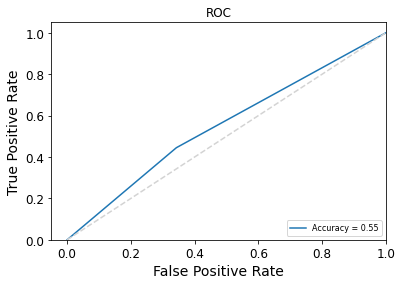

In [11]:
nbclf = DecisionTreeClassifier(criterion='entropy')
nbclf.fit(X_train, y_train)
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Cross validation

In [12]:
kf = KFold(n_splits=10, random_state=None, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

tree_clf = DecisionTreeClassifier(max_depth=10,random_state=42, criterion='entropy')
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, y_pred))

KFold(n_splits=10, random_state=None, shuffle=True)
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       188
           1       0.68      0.28      0.40       140

    accuracy                           0.64       328
   macro avg       0.66      0.59      0.57       328
weighted avg       0.65      0.64      0.59       328

              precision    recall  f1-score   support

           0       0.63      0.87      0.73       195
           1       0.55      0.24      0.34       133

    accuracy                           0.61       328
   macro avg       0.59      0.55      0.53       328
weighted avg       0.60      0.61      0.57       328

              precision    recall  f1-score   support

           0       0.63      0.88      0.73       193
           1       0.60      0.26      0.36       135

    accuracy                           0.62       328
   macro avg       0.62      0.57      0.55       328
weighted avg       0.6

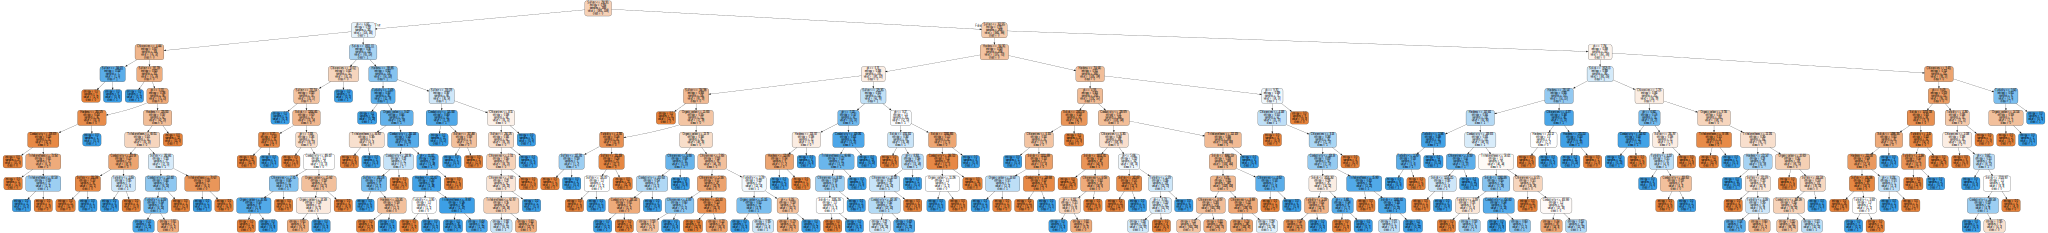

In [48]:
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "water.dot"),
        feature_names=feature_names,
        class_names=["0", "1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "water.dot"))

### kNN Classifier

Setting Up

In [55]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Optimizing parameters and improvement

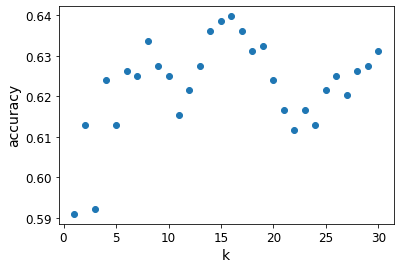

In [56]:
k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30]);

In [57]:
k_value = [1, 5, 15, 20, 25, 30]

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k}")
    
    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    
    # Print classification report
    target_names = ['0', '1']
   
    #classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)
    print(result_metrics)

k=1
[[343 159]
 [176 141]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       502
           1       0.47      0.44      0.46       317

    accuracy                           0.59       819
   macro avg       0.57      0.56      0.56       819
weighted avg       0.59      0.59      0.59       819

k=5
[[393 109]
 [208 109]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       502
           1       0.50      0.34      0.41       317

    accuracy                           0.61       819
   macro avg       0.58      0.56      0.56       819
weighted avg       0.59      0.61      0.59       819

k=15
[[448  54]
 [242  75]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       502
           1       0.58      0.24      0.34       317

    accuracy                           0.64       819
   macro avg       0.62      0.56      0.54   

Checking how sensitive is kNN classification accuracy to the train/test split

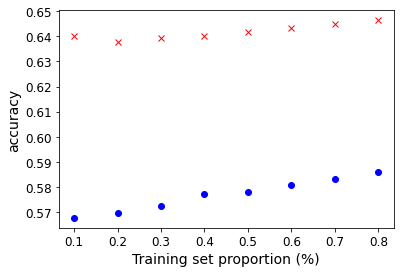

In [58]:
t = [x/10 for x in range(1, 9)]

knn = KNeighborsClassifier(n_neighbors = 15)

plt.figure()

for s in t:

    train_score = []
    test_score = []
    for i in range(1,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        train_score.append(knn.score(X_train, y_train))
        test_score.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(train_score), 'rx')    
    plt.plot(s, np.mean(test_score), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

ROC Curve

Accuracy =  0.50814453125


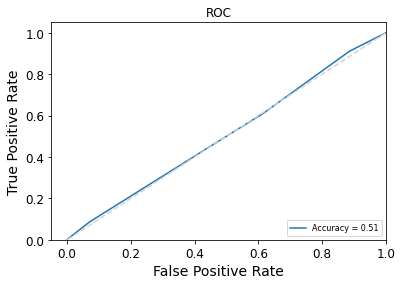

In [26]:
from sklearn.metrics import roc_curve, auc

nbclf = KNeighborsClassifier(n_neighbors=15)
nbclf.fit(X_train, y_train)
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Cross Validation

In [59]:
# create k-fold validation
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 3 folds

# change DataFrame to numpy array
XX = X.to_numpy()

knn = KNeighborsClassifier(n_neighbors = 15)

precision_sum = recall_sum = accuracy_sum = 0

for train_index, test_index in kf.split(XX):
    X_train, X_test = XX[train_index], XX[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    result_metrics_dict = classification_report(y_test, y_pred, output_dict=True)
    
    precision_sum += result_metrics_dict["weighted avg"]["precision"]
    recall_sum += result_metrics_dict["weighted avg"]["recall"]
    accuracy_sum += result_metrics_dict["accuracy"]

print("Avg precision (weighted):", precision_sum/kf.get_n_splits(X))
print("Avg recall (weighted):", recall_sum/kf.get_n_splits(X))
print("Accuracy:", accuracy_sum/kf.get_n_splits(X))

Avg precision (weighted): 0.5471260636645672
Avg recall (weighted): 0.584836279555456
Accuracy: 0.584836279555456


Improvement through attribute normalization

In [63]:
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_scaled, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.64


Performance Results

In [64]:
knn.score(X_test_scaled, y_test)

0.6361416361416361

In [65]:
y_pred = knn.predict(X_test_scaled)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[444  58]
 [240  77]]


In [66]:
# Print classification report
target_names = ['0', '1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)
print(result_metrics)

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       502
           1       0.57      0.24      0.34       317

    accuracy                           0.64       819
   macro avg       0.61      0.56      0.54       819
weighted avg       0.62      0.64      0.59       819



ROC Curve

Accuracy =  0.4902220769917177


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


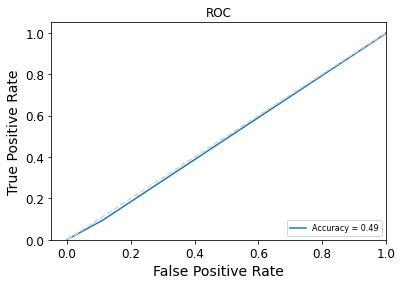

In [67]:
from sklearn.metrics import roc_curve, auc

nbclf = KNeighborsClassifier(n_neighbors=15)
nbclf.fit(X_train_scaled, y_train)
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)

print('Accuracy = ', roc_auc)

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()